In [13]:
%config Completer.use_jedi = False

In [14]:
import pandas as pd
import re

In [15]:
df = pd.read_csv('./notebooks_rotten-tomatoes/data/rotten-tomattoes-movie-reviews.csv')
df.head()

,label,text
0,1,the rock is destined to be the 21st century's ...
1,1,"the gorgeously elaborate continuation of "" the..."
2,1,effective but too-tepid biopic
3,1,if you sometimes like to go to the movies to h...
4,1,emerges as something rare an issue movie that'...


In [16]:
df['words'] = df['text'].apply(lambda text: len(text.split()))

In [17]:
df['words'].describe()

count    10662.000000
mean        20.074095
std          8.922335
min          1.000000
25%         13.000000
50%         19.000000
75%         26.000000
max         57.000000
Name: words, dtype: float64

<AxesSubplot:>

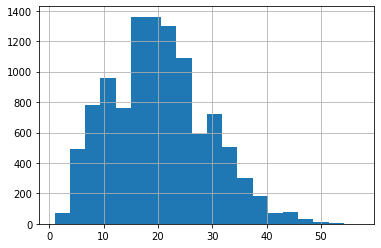

In [18]:
df['words'].hist(bins=20)

<ipython-input-19-aab4a998184a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['words'] > 10][df['words'] < 300]['words'].hist(bins=20)


<AxesSubplot:>

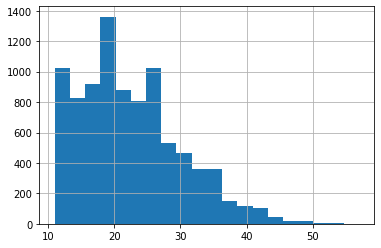

In [19]:
df[df['words'] > 10][df['words'] < 300]['words'].hist(bins=20)

In [20]:
df = df[df['words'] > 10][df['words'] < 300]
df['words'].describe()

<ipython-input-20-961878046756>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['words'] > 10][df['words'] < 300]


count    9012.000000
mean       22.403573
std         7.635399
min        11.000000
25%        16.000000
50%        21.000000
75%        27.000000
max        57.000000
Name: words, dtype: float64

In [21]:
df_sampled = df.sample(1000)
df_sampled

,label,text,words
6861,0,villeneuve spends too much time wallowing in b...,24
1903,1,"ultimately "" mib ii "" succeeds due to its rapi...",23
2936,1,a fine production with splendid singing by ang...,15
9460,0,if you're not fans of the adventues of steve a...,32
19,1,offers a breath of the fresh air of true sophi...,11
...,...,...,...
293,1,intriguing and beautiful film but those of you...,18
746,1,frida's artistic brilliance is undeniable -- i...,17
1145,1,so refreshingly incisive is grant that for the...,31
8906,0,an artful yet depressing film that makes a mel...,19


In [22]:
dt = df_sampled.sort_values(by='words', ignore_index=True)
dt

,label,text,words
0,1,drumline ably captures the complicated relatio...,11
1,1,delivers roughly equal amounts of beautiful mo...,11
2,1,saved from being merely way-cool by a basic c...,11
3,1,this is a movie full of grace and ultimately ...,11
4,1,the imax screen enhances the personal touch of...,11
...,...,...,...
995,0,the movie obviously seeks to re-create the exc...,48
996,0,at every opportunity to do something clever t...,48
997,0,the phone rings and a voice tells you you've g...,49
998,1,it may not be as cutting as witty or as true ...,49


In [23]:
dt.to_csv('data.csv')

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'words'}>]], dtype=object)

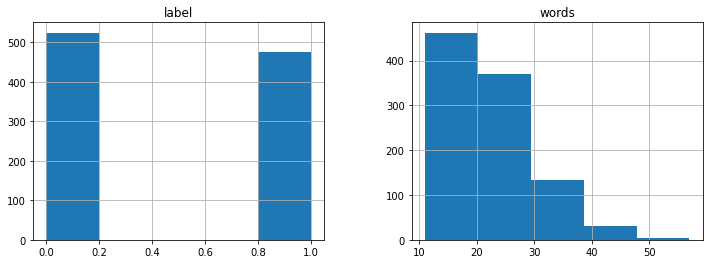

In [24]:
df_sampled[['label', 'words']].hist(bins=5, figsize=(12,4))